# **This Notebook is provided Training Example (PhC-C2DH-U373 Dataset) Using Colab**
The notebook arragemnet is as follow

*   **Prequesities**
  1.   Conect to github, Clone the repository
  2.   Configurate working directory and google drive connetction
  3.   Download and install Conda, create conda enviroment with all the required packages

*   **Trainings**
  1.   Run feature extraction for metric learning
  2.   Run metric learning training
  3.   Run compreensive feature extraction with metric learning
  4.   Run Cell Tracking training

*   **Inference**








# **Prequesities**

# 1. Conect to github, Clone the repository


In [1]:
import os
#! git clone https://github.com/talbenha/cell-tracker-gnn

#curr_workdir = f'./cell-tracker-gnn'
#if os.path.exists(curr_workdir):
#  os.chdir(curr_workdir)

# 2. Configurate working directory and google drive connetction


In [2]:
#import os
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
#file_path = '/content/drive/My Drive/CellTracking/nature_method_ctc/' # TODO: update this path
#if os.path.exists(file_path):
#  os.listdir(file_path)
#else:
#print("Error Path doesn't exist")

# 3. Download and install Conda, create conda enviroment with all the required packages

################################################################################
# INSTALL CONDA ON GOOGLE COLAB
################################################################################

# try to run the bare minimum to get a new conda env working
env_name = 'cell-tracking-challenge-mac310'
conda_path = ''
try:
    conda_path = ! which conda
finally:
    print('')

if (len(conda_path) == 0):
    print('installing miniconda')
    ! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
    ! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
    ! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
    import sys
    sys.path.append('/usr/local/lib/python3.7/site-packages/')
    ! conda init
    ! conda install -n root _license -y -q
else:
    print('found miniconda')

conda_envs = ! conda env list
res = [i for i in conda_envs if env_name in i]
if (len(res) == 0):
    print(f'not found {env_name} env', len(res))
    ! conda create --name cell-tracking-challenge-mac310 --file requirements-conda.txt
else:
    print(f'found {env_name} env', len(res))
print(f'{env_name} was created')

In [3]:
%%bash
#source activate cell-tracking-challenge
#conda activate cell-tracking-challenge
# install other requirements
#pip install -r requirements.txt
#pip install PyYAML==5.4.1

In [4]:
#!conda init
#!conda activate cell-tracking-challenge
#!pip install hydra-core==1.1.0
#!pip install python-dotenv==0.20.0
import dotenv
#from dotenv import load_dotenv


# **Training**
 The first two stages can be skipped (step #2 is long in colab) by using the pre-trained model (in step #3) provided under the [releases](https://github.com/talbenha/cell-tracker-gnn/releases) of the repository. For example for the pretrained model for PhC-C2DH-U373 dataset, download the software and find the model under `software/parameters/Features_Models/PhC-C2DH-U373/all_params.pth`

# 1. Run feature extraction for metric learning


In [8]:
%%bash
conda env list
#source activate cell-tracking-challenge
export HYDRA_FULL_ERROR=1
#export NUMEXPR_MAX_THREADS=24

export FOLDER_PATH=/home/tony/data/gnntest/CTC # TODO: update this path
export DATA_NAME=Fluo-N2DH-SIM+ # TODO: update this path

python run_feat_extract.py params.input_images="${FOLDER_PATH}/${DATA_NAME}" params.input_masks="${FOLDER_PATH}/${DATA_NAME}" params.input_seg="${FOLDER_PATH}/${DATA_NAME}" params.output_csv="${FOLDER_PATH}/basic_features" params.sequences=['01','02']  params.seg_dir='_GT/TRA' params.basic=True


# conda environments:
#
base                   /home/tony/miniconda3
99-deepcell-310        /home/tony/miniconda3/envs/99-deepcell-310
cell-tracking-challenge-linux37 * /home/tony/miniconda3/envs/cell-tracking-challenge-linux37
cell-tractr            /home/tony/miniconda3/envs/cell-tractr
trackastra             /home/tony/miniconda3/envs/trackastra

files were saved to : /home/tony/data/gnntest/CTC/basic_features/Fluo-N2DH-SIM+/01/csv
files were saved to : /home/tony/data/gnntest/CTC/basic_features/Fluo-N2DH-SIM+/02/csv


# 2. Run metric learning training
 Pay attention that this cell takes long time on google colab, so you can skip this stage and use the pre-trained model provided under the [releases](https://github.com/talbenha/cell-tracker-gnn/releases) of the repository. For example for the pretrained model for PhC-C2DH-U373 dataset, download the software and find the model under `software/parameters/Features_Models/PhC-C2DH-U373/all_params.pth`

In [5]:
#%%bash
#source activate cell-tracking-challenge
#export HYDRA_FULL_ERROR=1
#export FOLDER_PATH=/content/drive/MyDrive/CellTracking/nature_method_ctc # TODO: update this path
#export DATA_NAME=PhC-C2DH-U373 # TODO: update this path

#python run_train_metric_learning.py dataset.kwargs.data_dir_img="${FOLDER_PATH}/${DATA_NAME}" dataset.kwargs.data_dir_mask="${FOLDER_PATH}/${DATA_NAME}" dataset.kwargs.dir_csv="${FOLDER_PATH}/basic_features/${DATA_NAME}" dataset.kwargs.subdir_mask='GT/TRA'

--> output 'all_params.pth' is generated at end, it is the input_model (i.e. for METRIC_PATH variable) for the next step

# **3. Run compreensive feature extraction with metric learning**

In [6]:
!lsb_release -a
#conda init
#source activate cell-tracking-challenge
!conda activate cell-tracking-challenge



No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.6 LTS
Release:	20.04
Codename:	focal

CondaError: Run 'conda init' before 'conda activate'



In [7]:
%%bash
conda env list
export HYDRA_FULL_ERROR=1
#export NUMEXPR_MAX_THREADS=24
#export FOLDER_PATH=/content/drive/MyDrive/CellTracking/nature_method_ctc # TODO: update this path
export FOLDER_PATH=/home/tony/data/gnntest/CTC # TODO: update this path
export METRIC_PATH=/home/tony/data/gnntest/software/parameters/Features_Models/Fluo-N2DH-SIM+/all_params.pth # TODO: update this path
export DATA_NAME=Fluo-N2DH-SIM+ # TODO: update this path

python run_feat_extract.py params.input_images="${FOLDER_PATH}/${DATA_NAME}" params.input_masks="${FOLDER_PATH}/${DATA_NAME}" params.input_seg="${FOLDER_PATH}/${DATA_NAME}" params.output_csv="${FOLDER_PATH}/ct_features/" params.sequences=['01','02']  params.seg_dir='_GT/TRA' params.basic=False params.input_model="${METRIC_PATH}"


# conda environments:
#
base                   /home/tony/miniconda3
99-deepcell-310        /home/tony/miniconda3/envs/99-deepcell-310
cell-tracking-challenge-linux37 * /home/tony/miniconda3/envs/cell-tracking-challenge-linux37
cell-tractr            /home/tony/miniconda3/envs/cell-tractr
trackastra             /home/tony/miniconda3/envs/trackastra

[2025-07-10 14:42:56,087][numexpr.utils][INFO] - Note: NumExpr detected 48 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
[2025-07-10 14:42:56,087][numexpr.utils][INFO] - NumExpr defaulting to 8 threads.
Using resnet18 model architecture.
files were saved to : /home/tony/data/gnntest/CTC/ct_features/Fluo-N2DH-SIM+/01/csv
Using resnet18 model architecture.
files were saved to : /home/tony/data/gnntest/CTC/ct_features/Fluo-N2DH-SIM+/02/csv


# 4. Run Cell Tracking training

In [8]:
%%bash
export HYDRA_FULL_ERROR=1
#export NUMEXPR_MAX_THREADS=24
#export FOLDER_PATH=/content/drive/MyDrive/CellTracking/nature_method_ctc # TODO: update this path
export FOLDER_PATH=/home/tony/data/gnntest/CTC # TODO: update this path
export DATA_NAME=Fluo-N2DH-SIM+ # TODO: update this path
# cell tracking training run
python run.py datamodule.dataset_params.main_path="${FOLDER_PATH}/ct_features/${DATA_NAME}" datamodule.dataset_params.exp_name="2D_SIM" datamodule.dataset_params.drop_feat=[]

[2025-07-10 14:45:42,127][src.utils.utils][INFO] - Disabling python warnings! <config.disable_warnings=True>
⚙ CONFIG                                                                        
├── trainer                                                                     
│   └── _target_: pytorch_lightning.Trainer                                     
│       gpus: 1                                                                 
│       min_epochs: 1                                                           
│       max_epochs: 500                                                         
│       weights_summary: top                                                    
│       progress_bar_refresh_rate: 100                                          
│       terminate_on_nan: true                                                  
│                                                                               
├── model                                                                       


Processing...
Done!


Epoch 0: 100%|██████████| 18/18 [00:01<00:00, 12.53it/s]      
Validating: 0it [00:00, ?it/s]
Epoch 1: 100%|██████████| 18/18 [00:01<00:00, 16.46it/s, loss=1.17, v_num=0_0]  
Validating: 0it [00:00, ?it/s]
Epoch 2: 100%|██████████| 18/18 [00:01<00:00, 14.98it/s, loss=1.17, v_num=0_0, train/loss=1.170, train/acc=0.844, train/preds_sum=0.000, train/targets_sum=5.34e+3]  
Validating: 0it [00:00, ?it/s]
Epoch 3: 100%|██████████| 18/18 [00:01<00:00, 11.82it/s, loss=1.13, v_num=0_0, train/loss=1.160, train/acc=0.843, train/preds_sum=0.000, train/targets_sum=5.34e+3]  
Validating: 0it [00:00, ?it/s]
Epoch 4: 100%|██████████| 18/18 [00:01<00:00, 16.24it/s, loss=1.05, v_num=0_0, train/loss=1.110, train/acc=0.824, train/preds_sum=1.47e+3, train/targets_sum=5.34e+3]  
Validating: 0it [00:00, ?it/s]
Epoch 5: 100%|██████████| 18/18 [00:01<00:00, 16.07it/s, loss=0.958, v_num=0_0, train/loss=1.030, train/acc=0.735, train/preds_sum=9.98e+3, train/targets_sum=5.34e+3]  
Validating: 0it [00:00, ?it/s]
E

# **Inference**
Update the following variables:


*   MODEL_PYTORCH_LIGHTNING - according to the output of the previius cell
*   MODEL_METRIC_LEARNING
*   FOLDER_PATH - path to folder that contains the dataset
*   MODALITY





In [10]:
%%bash

#source activate cell-tracking-challenge
export SEQUENCE=01 # sequence number

export FOLDER_PATH=/home/tony/data/gnntest/CTC # T
export MODEL_METRIC_LEARNING=/home/tony/data/gnntest/software/parameters/Features_Models/Fluo-N2DH-SIM+/all_params.pth # TODO: update this path
#export MODEL_PYTORCH_LIGHTNING='/home/tony/code/cell-tracker-gnn/logs/runs/2025-07-10/13-17-22/checkpoints/epoch=30.ckpt' # TODO: update this path
export MODEL_PYTORCH_LIGHTNING='/home/tony/code/cell-tracker-gnn/logs/runs/2025-07-10/14-45-40/checkpoints/epoch=185.ckpt'

export DATA_NAME=Fluo-N2DH-SIM+ # TODO: update this path



export MODALITY="2D"  # dataset modality
export DATASET="${FOLDER_PATH}/${DATA_NAME}"
export CODE_TRA=src/inference/

#export PYTHONPATH=/content/cell-tracker-gnn
export PYTHONPATH=/home/tony/code/cell-tracker-gnn # TODO: update this path

# our model needs CSVs, so let's create from image and segmentation.
python ${CODE_TRA}/preprocess_seq2graph_clean.py -cs 20 -ii "${DATASET}/${SEQUENCE}" -iseg "${DATASET}/${SEQUENCE}_GT/TRA" -im "${MODEL_METRIC_LEARNING}" -oc "${DATASET}/${SEQUENCE}_CSV"

# run the prediction
python ${CODE_TRA}/inference_clean.py -mp "${MODEL_PYTORCH_LIGHTNING}" -ns "${SEQUENCE}" -oc "${DATASET}"

# create label maps
python ${CODE_TRA}/postprocess_clean.py -modality "${MODALITY}" -iseg "${DATASET}/${SEQUENCE}_GT/TRA" -oi "${DATASET}/${SEQUENCE}_RES_inference"


number of detected changes: 0
0
global_delta_row: 78
global_delta_col: 94
We don't assign new region of interest - use the old one
Using resnet18 model architecture.
files were saved to : /home/tony/data/gnntest/CTC/Fluo-N2DH-SIM+/01_CSV/csv
load model from: /home/tony/code/cell-tracker-gnn/logs/runs/2025-07-10/14-45-40/checkpoints/epoch=185.ckpt
"directed":        True
"loss_weights":    65
"lr":              0.001
"lr_sch_module":   {'target': None, 'monitor': 'val/acc', 'kwargs': {'verbose': True, 'mode': 'min'}}
"model_params":    {'target': 'CellTrack_Model', 'kwargs': {'hand_NodeEncoder_dic': {'input_dim': 13, 'fc_dims': [64, 16]}, 'learned_NodeEncoder_dic': {'input_dim': 128, 'fc_dims': [64, 16]}, 'intialize_EdgeEncoder_dic': {'input_dim': 239, 'fc_dims': [128, 64]}, 'message_passing': {'target': 'CellTrack_GNN', 'kwargs': {'in_channels': 32, 'hidden_channels': 32, 'in_edge_channels': 64, 'hidden_edge_channels_conv': 16, 'hidden_edge_channels_linear': [128, 64], 'dropout': 0.0, 

In [2]:
import tqdm as notebook_tqdm
import torch

# Load the files
pt_out_name = '/home/tony/data/gnntest/CTC/Fluo-N2DH-SIM+/01_RES_inference_SIM/raw_output.pt'
pt_pg_name= '/home/tony/data/gnntest/CTC/Fluo-N2DH-SIM+/01_RES_inference_SIM/pytorch_geometric_data.pt'
pg_data = torch.load(pt_pg_name, map_location='cpu')
raw_output = torch.load(pt_out_name, map_location='cpu')

# Print types
print("pytorch_geometric_data.pt type:", type(pg_data))
print("raw_output.pt type:", type(raw_output))


pytorch_geometric_data.pt type: <class 'torch_geometric.data.data.Data'>
raw_output.pt type: <class 'torch.Tensor'>


In [3]:
# For PyG Data object
if hasattr(pg_data, 'x') and hasattr(pg_data, 'edge_index'):
    print("Node features (x):", pg_data.x.shape)
    print("Edge index:", pg_data.edge_index.shape)
    print("Labels (y):", getattr(pg_data, 'y', None))


Node features (x): torch.Size([2601, 13])
Edge index: torch.Size([2, 22646])
Labels (y): None


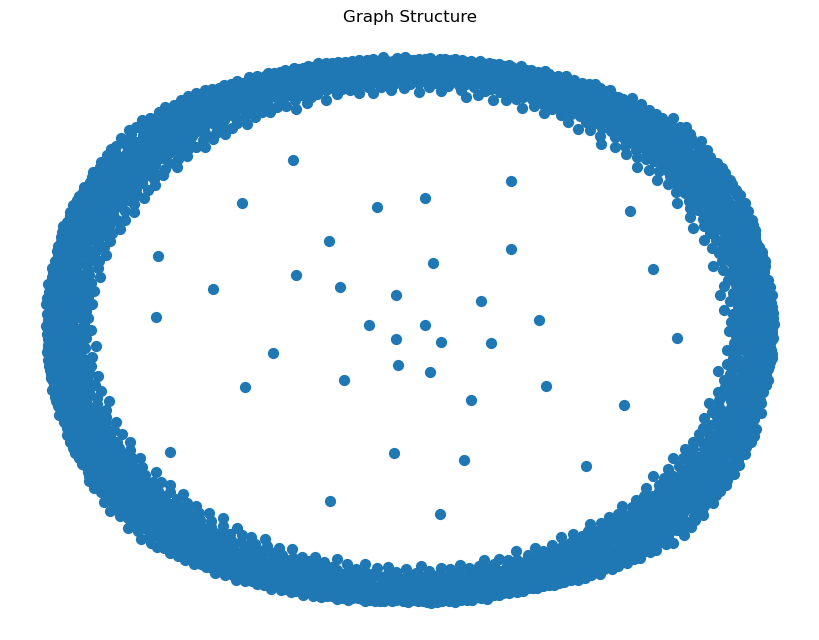

In [4]:
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import networkx as nx

G = to_networkx(pg_data, to_undirected=True)

plt.figure(figsize=(8, 6))
nx.draw(G, node_size=50)
plt.title("Graph Structure")
plt.show()
